In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

#!/usr/bin/env python3

seed_value=42

import os
import sys
import random as rn

from fastai.vision import *
from fastai.metrics import error_rate

import shutil

# -----------------------------
#from google.colab import drive
#from os import walk

#drive.mount('/content/gdrive')
# -----------------------------


# -----------------------------
# Make everything deterministic
os.environ['PYTHONHASHSEED']=str(seed_value)
np.random.seed(seed_value)
rn.seed(seed_value)

import torch

torch.manual_seed(seed_value)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
# -----------------------------

from subprocess import check_output
nvidia_smi_ = [0, 0]

def nvidia_smi(nvidia_smi_):
    old_nvidia_smi_ = nvidia_smi_[1]
    nvidia_smi_now  = int(check_output(['nvidia-smi', '--query-gpu=memory.used', '--format=csv,nounits,noheader']))
    nvidia_smi_[0]  = nvidia_smi_now
    nvidia_smi_[1]  = nvidia_smi_now - old_nvidia_smi_
    return nvidia_smi_ 

print('nvidia-smi memory usage/increment:', nvidia_smi(nvidia_smi_))

torch.cuda.empty_cache()

from datetime import datetime
currtime = datetime.now().strftime('%Y-%m-%d_%H.%M.%S')

#savepath ='/content/gdrive/My Drive/Colab Notebooks/'
#savepath ='/tmp/'
#imgpath = '/mnt/btrfs-data/winxp/pcap/winxp-unpatched-probe-only-with-noise/raw/image-data-bunch/'
#imgpath = '/mnt/btrfs-data/dataset/caddy-gestures/CADDY_gestures_complete_v2_release/caddy-gestures-complete-v2-release-all-scenarios-fast.ai'

caddy_gestures_dataset_dir   = 'all-scenarios-split-cristal-clear-vs-cloudy-and-dark'
caddy_gestures_dataset_fname = caddy_gestures_dataset_dir + '.zip'
caddy_gestures_dataset_url   = 'http://caddy-underwater-datasets.ge.issia.cnr.it/assets/caddy-gestures-TMP/' + caddy_gestures_dataset_fname

'''
caddy_gestures_dataset_dir   = 'caddy-gestures-complete-v2-release-all-scenarios-fast.ai'
caddy_gestures_dataset_fname = caddy_gestures_dataset_dir + '.zip'
caddy_gestures_dataset_url   = 'http://caddy-underwater-datasets.ge.issia.cnr.it/assets/caddy-gestures-TMP/caddy-gestures-complete-v2-release-all-scenarios-fast.ai/' + caddy_gestures_dataset_fname
'''


nvidia-smi memory usage/increment: [11, 11]


"\ncaddy_gestures_dataset_dir   = 'caddy-gestures-complete-v2-release-all-scenarios-fast.ai'\ncaddy_gestures_dataset_fname = caddy_gestures_dataset_dir + '.zip'\ncaddy_gestures_dataset_url   = 'http://caddy-underwater-datasets.ge.issia.cnr.it/assets/caddy-gestures-TMP/caddy-gestures-complete-v2-release-all-scenarios-fast.ai/' + caddy_gestures_dataset_fname\n"

In [2]:
!wget "$caddy_gestures_dataset_url"

--2019-09-10 14:44:37--  http://caddy-underwater-datasets.ge.issia.cnr.it/assets/caddy-gestures-TMP/all-scenarios-split-cristal-clear-vs-cloudy-and-dark.zip
Resolving caddy-underwater-datasets.ge.issia.cnr.it (caddy-underwater-datasets.ge.issia.cnr.it)... 150.145.4.194
Connecting to caddy-underwater-datasets.ge.issia.cnr.it (caddy-underwater-datasets.ge.issia.cnr.it)|150.145.4.194|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1540347170 (1.4G) [application/zip]
Saving to: ‘all-scenarios-split-cristal-clear-vs-cloudy-and-dark.zip’

all-scenarios-split 100%[===================>]   1.43G  23.9MB/s    in 63s     

2019-09-10 14:45:46 (23.4 MB/s) - ‘all-scenarios-split-cristal-clear-vs-cloudy-and-dark.zip’ saved [1540347170/1540347170]



In [3]:
!md5sum "$caddy_gestures_dataset_fname"
!unzip "$caddy_gestures_dataset_fname"
!ls

Output hidden; open in https://colab.research.google.com to view.

In [4]:
path = Path(caddy_gestures_dataset_dir) / 'all-scenarios'
path.ls()

[PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/photo'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/carry'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/exceptions.txt'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/here'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/one'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/end_comm'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/num_delimiter'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/backwards'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/four'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/three'),
 PosixPath('a

In [5]:
def find_all_dirs(directory: Path):   
    dir_list = [] # A list for storing directories existing in the provided path

    for x in directory.iterdir():
        if x.is_dir():
           dir_list.append(x)

    return dir_list
  
dir_list = find_all_dirs(path)

dir_list

[PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/photo'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/carry'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/here'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/one'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/end_comm'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/num_delimiter'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/backwards'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/four'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/three'),
 PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/mosaic'),
 PosixPath('all-scena

In [6]:
def find_all_files(directory: Path):   
    file_list = [] # A list for storing files existing in the provided path

    for x in directory.iterdir():
        if x.is_file():
           file_list.append(x)

    return file_list
  
for d in dir_list:
    subdir_list = find_all_dirs(d)
    print(subdir_list)                 # "crystal-clear", "cloudy-and-dark"
    print(d.stem, d)                   # "up", "all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/up"
    for sd in subdir_list:
        file_list = find_all_files(sd)
        print(file_list)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
from sklearn.model_selection import train_test_split

split_dataset_dir = 'caddy-gestures-complete-v2-release-all-scenarios-fast.ai-split'
split_path = Path(split_dataset_dir)
split_path.mkdir(exist_ok=True)
split_path.ls()

dataset_subdirs = ['train', 'valid', 'test']
all_dataset = {}

for ds in dataset_subdirs:
    (split_path / ds).mkdir(exist_ok=True)
    all_dataset[ds] = {}

file_lists = []

what_will_become_train_and_valid_dir = 'crystal-clear'     # this subdir will be split 80/20 to become train/valid dirs, the other one will become test dir
#what_will_become_train_and_valid_dir = 'cloudy-and-dark'     # this subdir will be split 80/20 to become train/valid dirs, the other one will become test dir


for d in dir_list:
    '''                         # use this to debug. "five" has less than 100 elements
    if d.stem != 'five':
        continue
    '''

    for ds in dataset_subdirs:
        (split_path / ds / d.stem).mkdir(exist_ok=True)

    
    subdir_list = find_all_dirs(d)
    #print(subdir_list)                 # "crystal-clear", "cloudy-and-dark"
    print(80*'-')
    print(d.stem, d)                    # "up", "all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/up"
    print(80*'-')
    for sd in subdir_list:
        file_list = find_all_files(sd)
        
        if str(sd.stem) == what_will_become_train_and_valid_dir:
            train, valid = train_test_split(file_list, shuffle=False, test_size=0.20, random_state=seed_value)
            print(train[:2], len(train))
            print(valid[:2], len(valid))
            all_dataset['train'][d.stem] = train
            all_dataset['valid'][d.stem] = valid
            print(20*'-')
        else:
            test = file_list
            print(test[:2], len(test))
            all_dataset['test'][d.stem]  = test

--------------------------------------------------------------------------------
boat all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat
--------------------------------------------------------------------------------
[PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/cloudy-and-dark/boat___brodarski-C_00594_left.jpg'), PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/cloudy-and-dark/boat___brodarski-D_00204_left.jpg')] 362
[PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/crystal-clear/boat___genova-A_02650_right.jpg'), PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/crystal-clear/boat___biograd-A_01006_right.jpg')] 300
[PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/crystal-clear/boat___genova-A_02588_left.jpg'), PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat

In [8]:
sz    = {}
total = {}

for d in dir_list:                             # 'up', 'down', 'carry'
    sz[d.stem]    = {}
    total[d.stem] = 0
    for ds in dataset_subdirs:                 # 'train', 'valid', 'test'
        sz[d.stem][ds] = len(all_dataset[ds][d.stem])
        print(f'Gesture {d.stem}\t\t- {ds} set - size: {sz[d.stem][ds]} - {all_dataset[ds][d.stem][:2]}')
        total[d.stem] += sz[d.stem][ds]
        
for d in dir_list:
    print(f'Gesture {d.stem}\t\t- total: {total[d.stem]} - split: {sz[d.stem]["train"]/total[d.stem]:0.3f}/{sz[d.stem]["valid"]/total[d.stem]:0.3f}/{sz[d.stem]["test"]/total[d.stem]:0.3f}')
    

Gesture boat		- train set - size: 300 - [PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/crystal-clear/boat___genova-A_02650_right.jpg'), PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/crystal-clear/boat___biograd-A_01006_right.jpg')]
Gesture boat		- valid set - size: 76 - [PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/crystal-clear/boat___genova-A_02588_left.jpg'), PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/crystal-clear/boat___genova-A_02657_left.jpg')]
Gesture boat		- test set - size: 362 - [PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/cloudy-and-dark/boat___brodarski-C_00594_left.jpg'), PosixPath('all-scenarios-split-cristal-clear-vs-cloudy-and-dark/all-scenarios/boat/cloudy-and-dark/boat___brodarski-D_00204_left.jpg')]
Gesture photo		- train set - size: 979 - [PosixPath('all-scenarios-split-cristal

In [0]:
for d in dir_list:                             # 'up', 'down', 'carry'
    '''
    if d.stem != 'five':
        continue
    '''

    subdir_list = find_all_dirs(d)
    for ds in dataset_subdirs:             # 'train', 'valid', 'test'
        dst_path = split_path / ds / d.stem
        for f in all_dataset[ds][d.stem]:
            shutil.copy(f, dst_path)

In [10]:
for d in dir_list:                             # 'up', 'down', 'carry'
    subdir_list = find_all_dirs(d)
    for ds in dataset_subdirs:                 # 'train', 'valid', 'test'
        dst_path = split_path / ds / d.stem
        print(dst_path.ls())

Output hidden; open in https://colab.research.google.com to view.

16 ['backwards', 'boat', 'carry', 'down', 'end_comm', 'five', 'four', 'here', 'mosaic', 'num_delimiter', 'one', 'photo', 'start_comm', 'three', 'two', 'up'] 16
nvidia-smi memory usage/increment: [398, 11]


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 72650616.86it/s]


nvidia-smi memory usage/increment: [456, 445]
Learner ready.


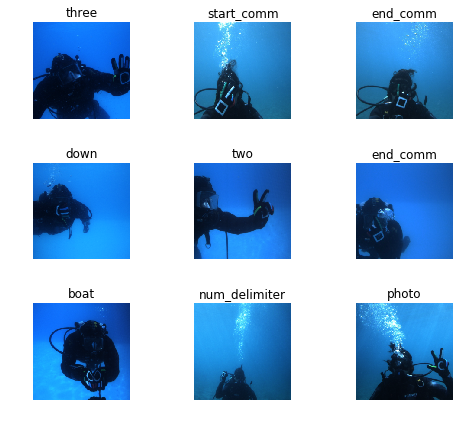

In [12]:
model_name = "resnet-50"
if model_name == "resnet-34":
	cnn_model = models.resnet34
	img_size  = 224
	epochs    = 4
	epochs_after_unfreeze = 2
	bs = 64
	# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart
else:
	cnn_model = models.resnet50
	img_size  = 224
	epochs    = 4
	epochs_after_unfreeze = 1
	bs = 32
	#bs = 4   # uncomment this line if you run out of memory even after clicking Kernel->Restart

tfms = get_transforms()
data = ImageDataBunch.from_folder(split_path, test='test', bs=bs, ds_tfms=tfms, size=img_size).normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(7,6))

print(len(data.classes), data.classes, data.c)

print('nvidia-smi memory usage/increment:', nvidia_smi(nvidia_smi_))

learn = cnn_learner(data, cnn_model, metrics=error_rate)

print('nvidia-smi memory usage/increment:', nvidia_smi(nvidia_smi_))
print('Learner ready.')

boat torch.Size([480, 640])


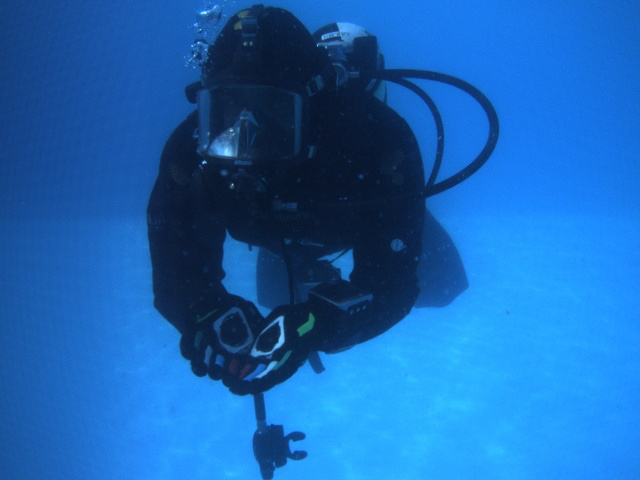

In [13]:
idx=100
img   = data.train_dl.dl.dataset.x[idx]
label = data.train_dl.dl.dataset.y[idx]
print(label, img.size)
img

photo torch.Size([480, 640])


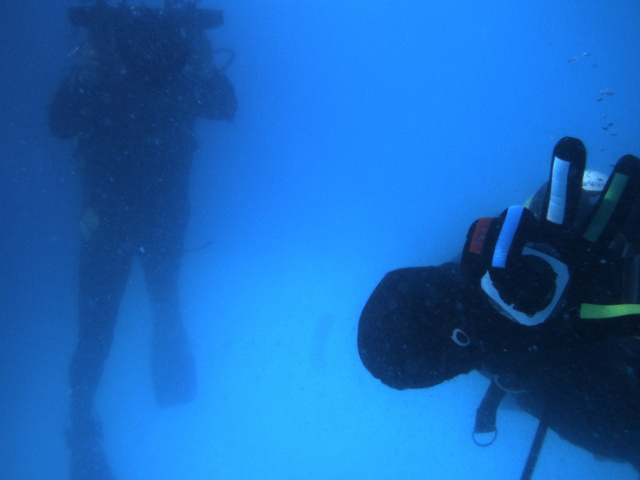

In [14]:
idx=101
img   = data.valid_dl.dl.dataset.x[idx]
label = data.valid_dl.dl.dataset.y[idx]
print(label, img.size)
img

 torch.Size([480, 640])


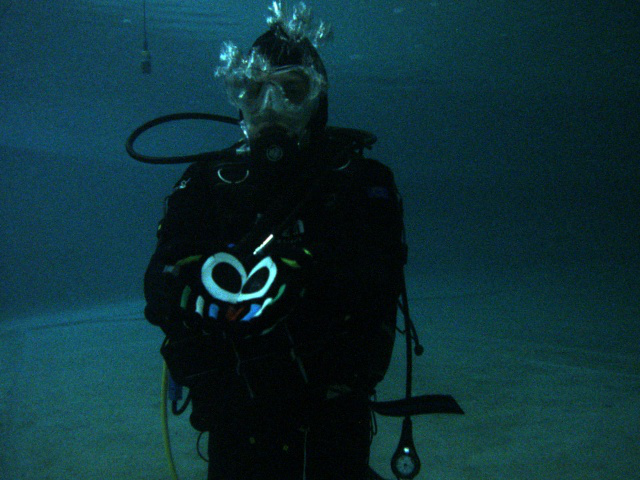

In [15]:
idx=102
img   = data.test_dl.dl.dataset.x[idx]
label = data.test_dl.dl.dataset.y[idx]
print(label, img.size)
img

In [16]:
print('nvidia-smi memory usage/increment:', nvidia_smi(nvidia_smi_))

load_saved_model = False
savepath ='/content/'

if load_saved_model:
	 print('Loading stage-1')
	 #learn.load(savepath + model_name + '-stage-1')
	 learn.load(savepath + 'resnet-50-stage-1-2019-07-11_16.24.10')
else:
	 print(f'Training model: {model_name} for {epochs} epochs with batch size: {bs}')
	 learn.fit_one_cycle(epochs)
	 learn.save(savepath + model_name + '-stage-1-' + currtime)

print('nvidia-smi memory usage/increment:', nvidia_smi(nvidia_smi_))

nvidia-smi memory usage/increment: [456, 11]
Training model: resnet-50 for 4 epochs with batch size: 32


nvidia-smi memory usage/increment: [3623, 3612]


In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

savepath = Path('/content/gdrive/My Drive/Colab Notebooks/caddy-gestures-resnet-models/')
savepath.mkdir(exist_ok=True)
learn.save(savepath / (model_name + '-stage-1-' + currtime))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [18]:
print('Exporting the model as pickle file...')
learn.export(savepath / (model_name + '-stage-1-' + currtime + 'pkl')) # export model as pickle file to be used "outside fast.ai"

Exporting the model as pickle file...


Plotting top losses for stage-1


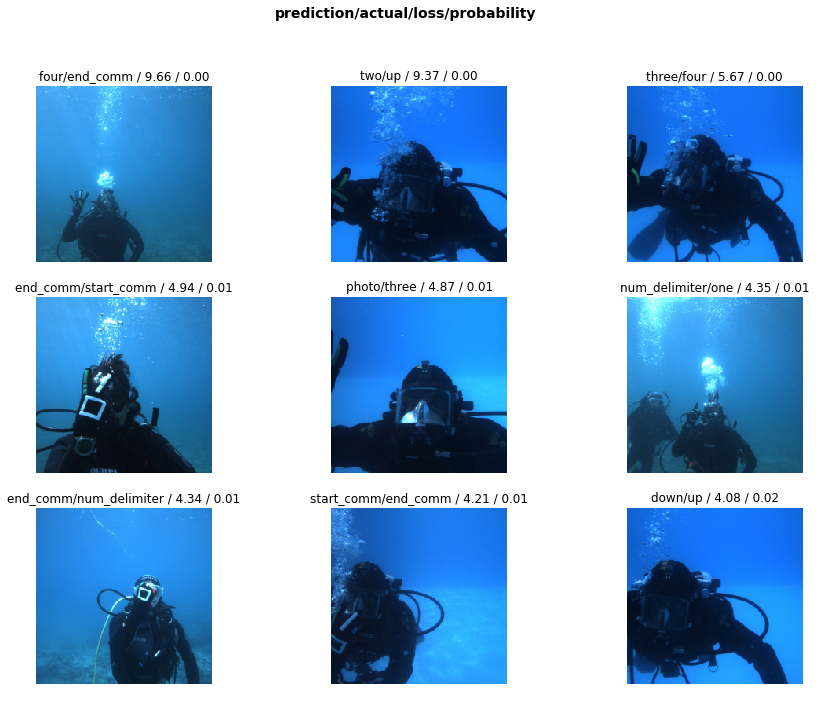

In [19]:
print('Interpreting result for stage-1')
interp = ClassificationInterpretation.from_learner(learn)
print('Plotting top losses for stage-1')
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))

Plotting confusion matrix/top confused for stage-1


[('start_comm', 'end_comm', 19),
 ('end_comm', 'start_comm', 8),
 ('num_delimiter', 'end_comm', 5),
 ('three', 'four', 5),
 ('four', 'three', 4),
 ('one', 'two', 3),
 ('photo', 'num_delimiter', 3),
 ('two', 'photo', 3),
 ('up', 'carry', 3),
 ('up', 'end_comm', 3),
 ('carry', 'up', 2),
 ('five', 'four', 2),
 ('mosaic', 'num_delimiter', 2),
 ('one', 'num_delimiter', 2),
 ('three', 'two', 2),
 ('two', 'three', 2)]

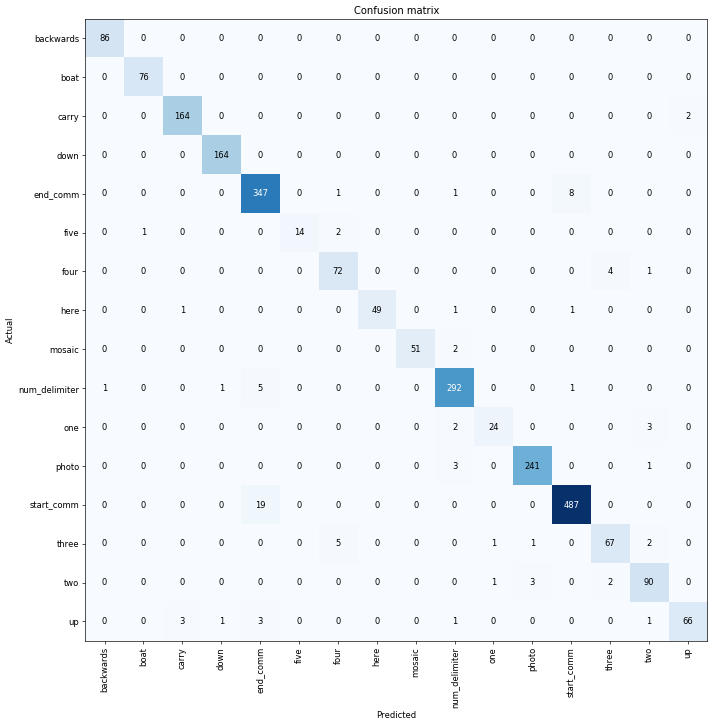

In [20]:
print('Plotting confusion matrix/top confused for stage-1')
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.most_confused(min_val=2)

# Huston, we have a problem...

![alt text](https://i.ibb.co/86k8rFN/image.png)

So it's not possible to have a labeled test set in the same databunch used for training/validation of the model. Ok, let's follow the advice and build another databunch with training and test set (used as validation set). <spoiler> In Keras there's a handy [model.evaluate()](https://keras.io/models/model/#evaluate) function to test the model. </spoiler>

16 ['backwards', 'boat', 'carry', 'down', 'end_comm', 'five', 'four', 'here', 'mosaic', 'num_delimiter', 'one', 'photo', 'start_comm', 'three', 'two', 'up'] 16


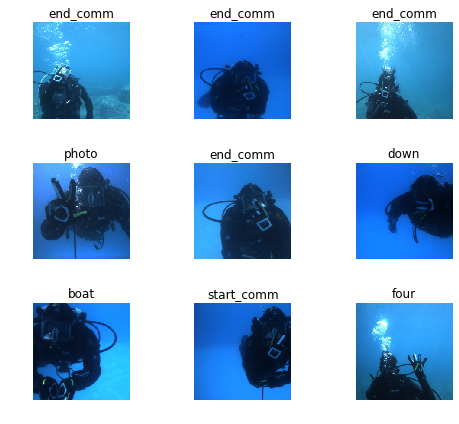

In [21]:
tfms = get_transforms()
data_test = ImageDataBunch.from_folder(split_path, train='train', valid='test', bs=bs, ds_tfms=tfms, size=img_size).normalize(imagenet_stats)

data_test.show_batch(rows=3, figsize=(7,6))

print(len(data_test.classes), data_test.classes, data_test.c)

boat torch.Size([480, 640])


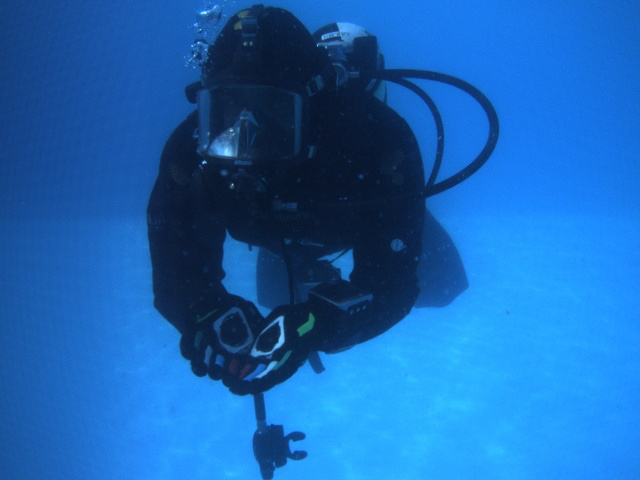

In [22]:
idx=100
img   = data_test.train_dl.dl.dataset.x[idx]
label = data_test.train_dl.dl.dataset.y[idx]
print(label, img.size)
img

boat torch.Size([480, 640])


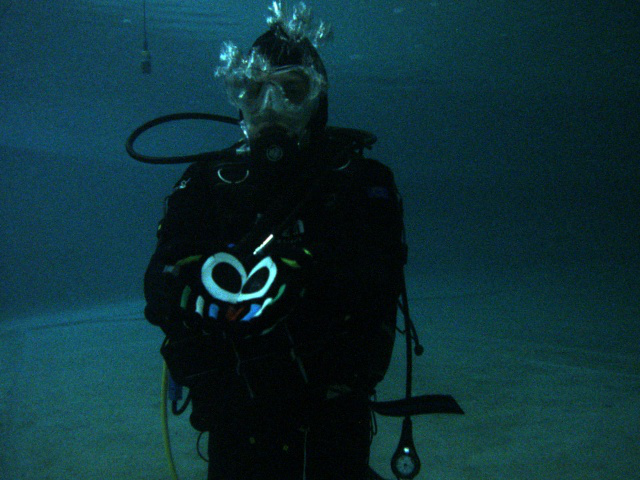

In [23]:
idx=102
img   = data_test.valid_dl.dl.dataset.x[idx]
label = data_test.valid_dl.dl.dataset.y[idx]
print(label, img.size)
img

In [25]:
print(learn.data, data, data_test)

ImageDataBunch;

Train: LabelList (9477 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boat,boat,boat,boat,boat
Path: caddy-gestures-complete-v2-release-all-scenarios-fast.ai-split;

Valid: LabelList (2375 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boat,boat,boat,boat,boat
Path: caddy-gestures-complete-v2-release-all-scenarios-fast.ai-split;

Test: LabelList (6626 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: caddy-gestures-complete-v2-release-all-scenarios-fast.ai-split ImageDataBunch;

Train: LabelList (9477 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boat,boat,boat,boat,boat
Path: caddy-gestures-complete-v2-relea

In [0]:
learn.data = data_test

In [27]:
print(learn.data, data, data_test)

ImageDataBunch;

Train: LabelList (9477 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boat,boat,boat,boat,boat
Path: caddy-gestures-complete-v2-release-all-scenarios-fast.ai-split;

Valid: LabelList (6626 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boat,boat,boat,boat,boat
Path: caddy-gestures-complete-v2-release-all-scenarios-fast.ai-split;

Test: None ImageDataBunch;

Train: LabelList (9477 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boat,boat,boat,boat,boat
Path: caddy-gestures-complete-v2-release-all-scenarios-fast.ai-split;

Valid: LabelList (2375 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boat,boat,boat,boat,boat
Path: 

In [28]:
print('nvidia-smi memory usage/increment:', nvidia_smi(nvidia_smi_))

learn.validate(data_test.valid_dl)

print('nvidia-smi memory usage/increment:', nvidia_smi(nvidia_smi_))

nvidia-smi memory usage/increment: [535, 524]


Plotting top losses for stage-1 (test set)


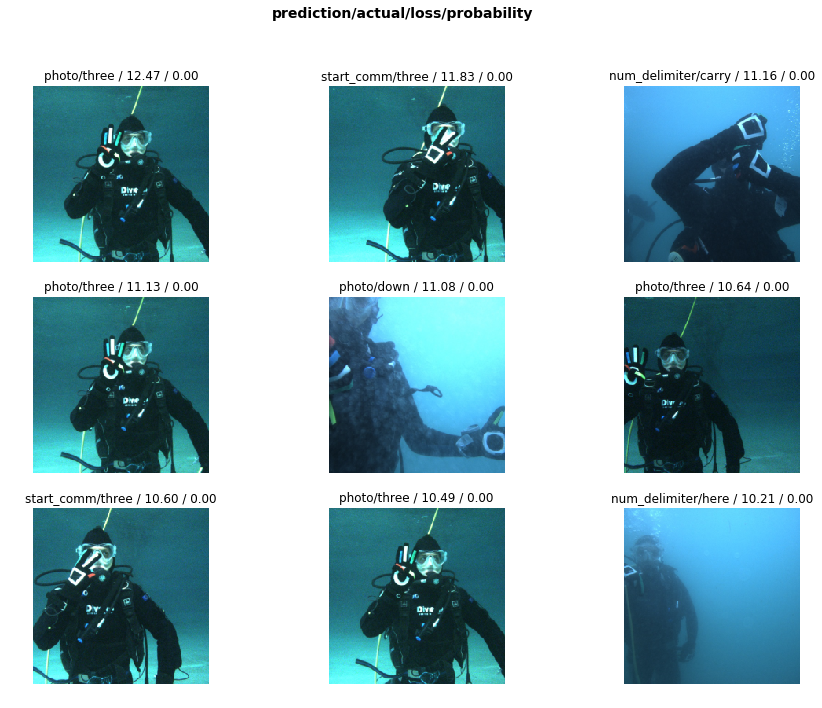

In [29]:
print('Interpreting result for stage-1 (test set)')
interp = ClassificationInterpretation.from_learner(learn)
print('Plotting top losses for stage-1 (test set)')
losses,idxs = interp.top_losses()
len(data_test.valid_ds)==len(losses)==len(idxs)
interp.plot_top_losses(9, figsize=(15,11))

Plotting confusion matrix/top confused for stage-1


[('end_comm', 'start_comm', 297),
 ('two', 'photo', 240),
 ('three', 'photo', 160),
 ('one', 'two', 141),
 ('num_delimiter', 'end_comm', 123),
 ('carry', 'num_delimiter', 94),
 ('here', 'start_comm', 80),
 ('here', 'end_comm', 78),
 ('start_comm', 'end_comm', 74),
 ('up', 'end_comm', 72),
 ('three', 'four', 70),
 ('carry', 'end_comm', 66),
 ('backwards', 'num_delimiter', 53),
 ('backwards', 'here', 41),
 ('up', 'num_delimiter', 38),
 ('down', 'num_delimiter', 32),
 ('here', 'num_delimiter', 32),
 ('num_delimiter', 'start_comm', 31),
 ('carry', 'up', 29),
 ('boat', 'end_comm', 26),
 ('up', 'photo', 24),
 ('photo', 'num_delimiter', 22),
 ('boat', 'photo', 20),
 ('three', 'start_comm', 19),
 ('backwards', 'end_comm', 17),
 ('carry', 'start_comm', 17),
 ('four', 'photo', 17),
 ('one', 'three', 17),
 ('three', 'two', 17),
 ('two', 'boat', 17),
 ('here', 'up', 16),
 ('boat', 'start_comm', 15),
 ('end_comm', 'num_delimiter', 14),
 ('boat', 'up', 13),
 ('here', 'backwards', 13),
 ('photo', 'en

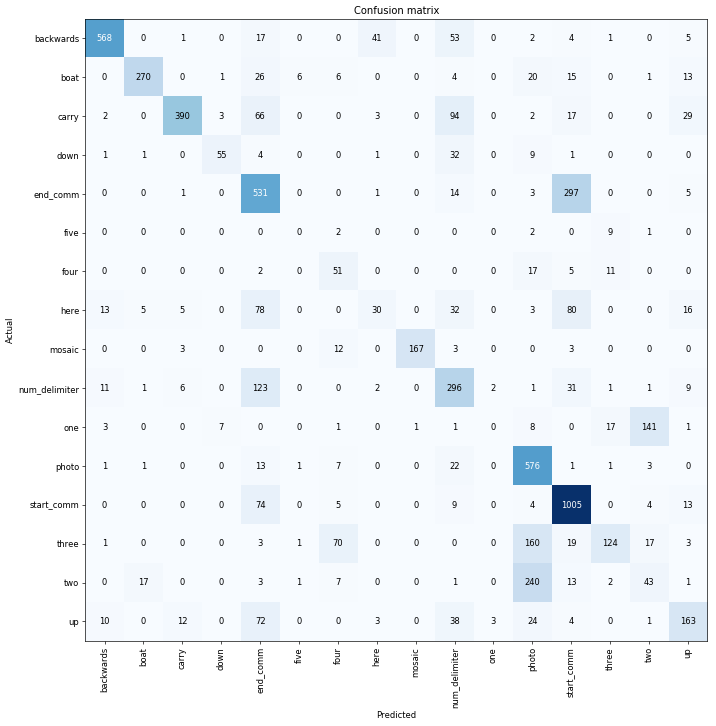

In [30]:
print('Plotting confusion matrix/top confused for stage-1')
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
interp.most_confused(min_val=2)

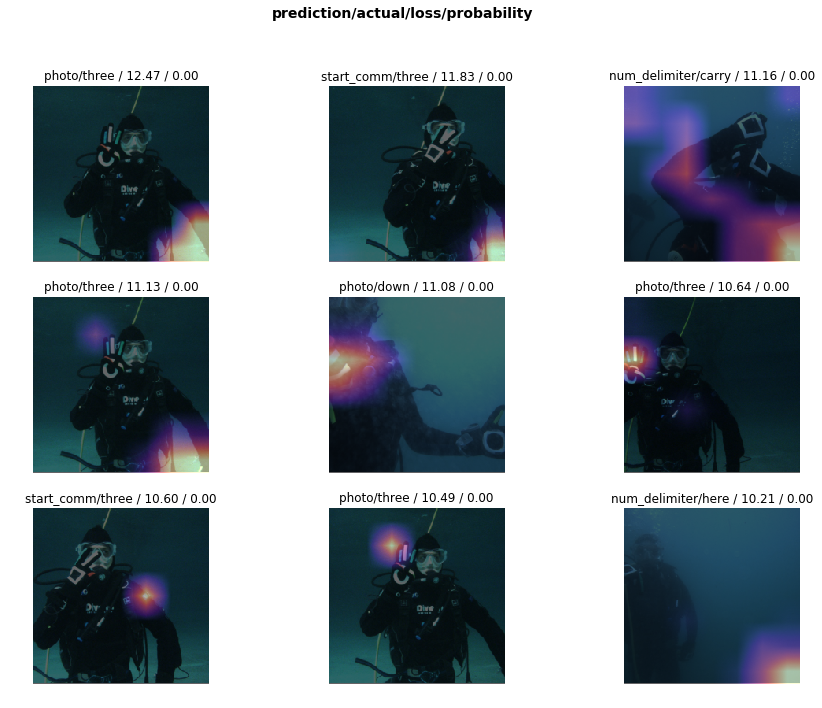

In [33]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)